# Y-at-il des différences selon l'âge et le genre dans les expériences "spirituelles" liées aux rêves ? 

**Author** : Laetitia Carli

**Date** : June 2025

## 1. Library import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import networkx as nx
from statsmodels.miscmodels.ordinal_model import OrderedModel

## 2. Directed acyclic graph

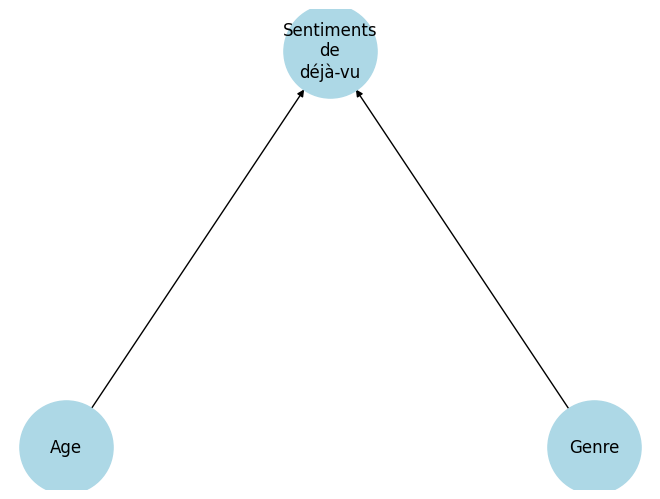

In [2]:
G = nx.DiGraph()

nodes = ['Age', 'Genre','Sentiments\nde\ndéjà-vu']
G.add_nodes_from(nodes)

edges = [('Age', 'Sentiments\nde\ndéjà-vu'), ('Genre', 'Sentiments\nde\ndéjà-vu')]
G.add_edges_from(edges)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 4500, node_color ='lightblue', arrows = True, font_size = 12)
plt.show()

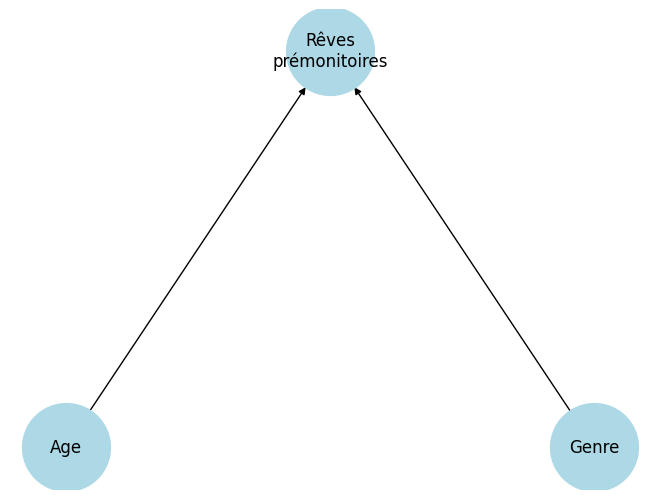

In [3]:
G = nx.DiGraph()

nodes = ['Age', 'Genre','Rêves\nprémonitoires']
G.add_nodes_from(nodes)

edges = [('Age', 'Rêves\nprémonitoires'), ('Genre', 'Rêves\nprémonitoires')]
G.add_edges_from(edges)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 4000, node_color ='lightblue', arrows = True, font_size = 12)
plt.show()

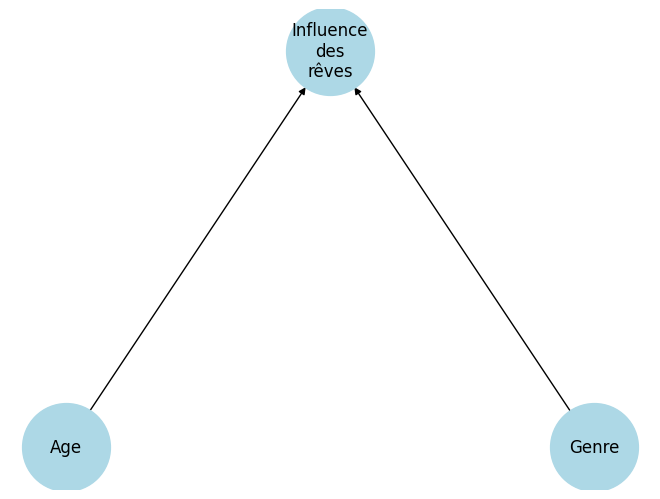

In [4]:
G = nx.DiGraph()

nodes = ['Age', 'Genre','Influence\ndes\nrêves']
G.add_nodes_from(nodes)

edges = [('Age', 'Influence\ndes\nrêves'), ('Genre', 'Influence\ndes\nrêves')]
G.add_edges_from(edges)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 4000, node_color ='lightblue', arrows = True, font_size = 12)
plt.show()

## 3. Data import 

In [5]:
df = pd.read_csv("questionnaire_dataset.csv", encoding='utf-8')
df

Horodateur Âge (en chiffre) Genre   \
0    04/06/2025 16:15:10               19  Femme   
1    04/06/2025 17:16:08               18  Femme   
2    04/06/2025 17:53:57               19  Femme   
3    12/06/2025 13:59:40               16  Femme   
4    12/06/2025 13:59:55               20  Femme   
..                   ...              ...    ...   
251  17/06/2025 08:18:48               17  Homme   
252  17/06/2025 09:37:34               20  Femme   
253  17/06/2025 10:19:54               21  Femme   
254  18/06/2025 13:13:12               19  Femme   
255  18/06/2025 23:03:37               47  Femme   

    À quelle fréquence avez-vous des sentiments de déjà-vu ?   \
0                                              Souvent          
1                                         Très souvent          
2                                              Souvent          
3                                             Rarement          
4                                              Souvent          
..                                                 ...          
251                                       Très souvent          
252                                           Rarement          
253                                            Souvent          
254                                           Rarement          
255                                            Souvent          

    A quelle fréquence faites-vous des cauchemars ?  \
0                                    Je ne sais pas   
1                                          Rarement   
2                                          Rarement   
3                                          Rarement   
4                                          Rarement   
..                                              ...   
251                                        Rarement   
252                                        Rarement   
253                                         Souvent   
254                                        Rarement   
255                                        Rarement   

    Les rêves sont une expérience que j'apprécie.   \
0                                           Neutre   
1                                         D'accord   
2                                         D'accord   
3                                         D'accord   
4                              Totalement d'accord   
..                                             ...   
251                                         Neutre   
252                                       D'accord   
253                                       D'accord   
254                                       D'accord   
255                                       D'accord   

    Rêvez-vous en couleur ou en noir et blanc ?  \
0                                Je ne sais pas   
1                                    En couleur   
2                                    En couleur   
3                                    En couleur   
4                                    En couleur   
..                                          ...   
251                                    Les deux   
252                                         NaN   
253                                  En couleur   
254                                  En couleur   
255                                  En couleur   

    Mes rêves ont déjà influencé mes actions.  \
0                                    D'accord   
1                                      Neutre   
2                                    D'accord   
3                                Pas d'accord   
4                         Totalement d'accord   
..                                        ...   
251                                  D'accord   
252                                    Neutre   
253                                  D'accord   
254                                  D'accord   
255                                  D'accord   

    Je me souviens souvent de mes rêves.  \
0                   Pas du tout d'accord   
1       

## 4. Data manipulation

### 4.1 Rename columns

In [7]:
df = df.rename(columns={'Âge (en chiffre)': 'Age'})

In [8]:
df = df.rename(columns={'Genre ': 'Genre'})

In [9]:
df = df.rename(columns={'À quelle fréquence avez-vous des sentiments de déjà-vu ? ': 'deja_vu'})

In [10]:
df = df.rename(columns={'J\'ai déjà eu le sentiment que mes rêves étaient prémonitoires.': 'premonitoire'})

In [11]:
df = df.rename(columns={'Mes rêves ont déjà influencé mes actions.': 'influence'})

### 4.2 Select and clean the data

In [12]:
age_dict = {"20 ans" : 20,
       "55 ans" : 55,
       "soixante deux ans" : 62,
       "18 ans": 18
              }
df['Age'] = df['Age'].astype(str).str.strip().str.lower()
df.loc[:, 'Age'] = df['Age'].replace(age_dict)


In [13]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  

In [14]:
df = df[df['Genre'].isin(["Femme", "Homme"])]

## 5. Data description

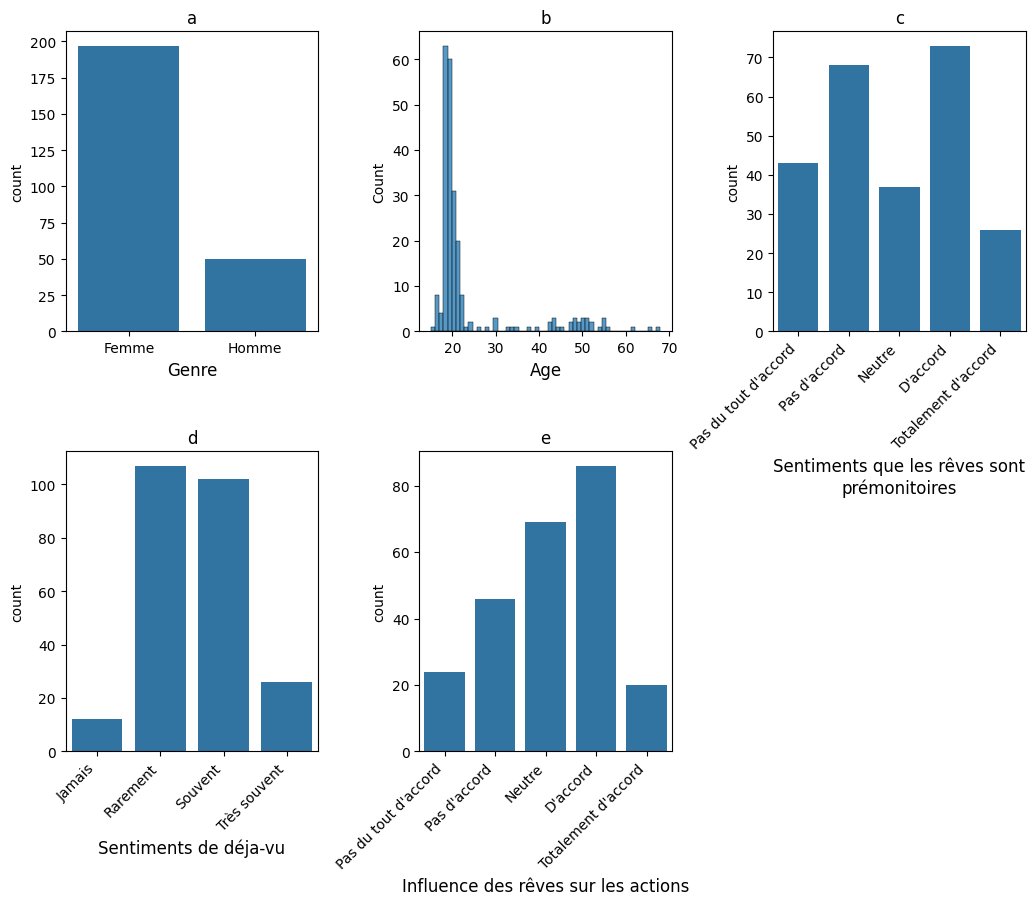

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(12, 9))

sns.countplot(x = df['Genre'], ax = axs[0, 0])
axs[0, 0].set_xlabel("Genre", fontsize = 12)
axs[0, 0].set_title("a")

sns.histplot(x = df['Age'], ax = axs[0, 1])
axs[0, 1].set_xlabel("Age", fontsize = 12)
axs[0, 1].set_title("b")

sns.countplot(x = df['premonitoire'], order=["Pas du tout d'accord",
    "Pas d'accord", "Neutre","D'accord", "Totalement d'accord", ], ax = axs[0, 2]) 
for tick in axs[0,2].get_xticklabels():
        tick.set_rotation(45)
        tick.set_ha('right')
axs[0, 2].set_xlabel("Sentiments que les rêves sont\nprémonitoires", fontsize = 12)
axs[0, 2].set_title("c")

sns.countplot(x = df['deja_vu'], order=[
    "Jamais", "Rarement","Souvent", "Très souvent", ], ax = axs[1, 0]) 
for tick in axs[1,0].get_xticklabels():
        tick.set_rotation(45)
        tick.set_ha('right')
axs[1, 0].set_xlabel("Sentiments de déja-vu", fontsize = 12)
axs[1, 0].set_title("d")

sns.countplot(x = df['influence'], order=["Pas du tout d'accord",
    "Pas d'accord", "Neutre","D'accord", "Totalement d'accord"], ax = axs[1, 1]) 
for tick in axs[1,1].get_xticklabels():
        tick.set_rotation(45)
        tick.set_ha('right')
axs[1, 1].set_xlabel("Influence des rêves sur les actions", fontsize = 12)
axs[1, 1].set_title("e")

fig.delaxes(axs[1,2])

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

## 6. Data modelling

In [16]:
df.dropna(subset = ['Age', 'Genre', 'deja_vu', 'influence', 'premonitoire'], inplace=True)

In [17]:
pd.set_option('future.no_silent_downcasting', True)
df['premonitoire'] = df['premonitoire'].astype(str).str.strip().str.lower()
premonitoire_dict = {"pas du tout d'accord" : 1,
                     "pas d'accord": 2,
                     "neutre" : 3,
                     "d'accord" : 4,
                     "totalement d'accord": 5
                    }
df.loc[:,'premonitoire'] = df['premonitoire'].replace(premonitoire_dict)
df['premonitoire'] = df['premonitoire'].astype('Int64')

In [18]:
model = smf.ols(formula = 'premonitoire ~ Age + Genre', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           premonitoire   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.908
Date:                Thu, 19 Jun 2025   Prob (F-statistic):              0.151
Time:                        09:27:28   Log-Likelihood:                -392.09
No. Observations:                 236   AIC:                             790.2
Df Residuals:                     233   BIC:                             800.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1596      0.201     15.721      0.000       2.764       3.556
Genre[T.Homme]    -0.3237      0.206     -1.570      0.118      -0.730       0.082
Age               -0.0082      0.008     -1.079      0.282      -0.023       0.007
==============================================================================
Omnibus:                       97.093   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.481
Skew:                           0.040   Prob(JB):                      0.00118
Kurtosis:                       1.832   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
pd.set_option('future.no_silent_downcasting', True)
df['influence'] = df['influence'].astype(str).str.strip().str.lower()
influence_dict = {"pas du tout d'accord" : 1,
                     "pas d'accord": 2,
                     "neutre" : 3,
                     "d'accord" : 4,
                     "totalement d'accord": 5
                    }
df.loc[:,'influence'] = df['influence'].replace(influence_dict)
df['influence'] = df['influence'].astype('Int64')

In [20]:
model = smf.ols(formula = 'influence ~ Age + Genre', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              influence   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.858
Date:                Thu, 19 Jun 2025   Prob (F-statistic):              0.158
Time:                        09:27:29   Log-Likelihood:                -358.05
No. Observations:                 236   AIC:                             722.1
Df Residuals:                     233   BIC:                             732.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4406      0.174     19.775      0.000       3.098       3.783
Genre[T.Homme]     0.0368      0.178      0.206      0.837      -0.315       0.388
Age               -0.0127      0.007     -1.925      0.055      -0.026       0.000
==============================================================================
Omnibus:                       13.887   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.681
Skew:                          -0.322   Prob(JB):                       0.0130
Kurtosis:                       2.315   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
deja_vu_dict = {"Jamais" : 1,
                     "Rarement" : 2,
                     "Souvent" : 3,
                     "Très souvent": 4
                    }
df.loc[:,'deja_vu'] = df['deja_vu'].replace(deja_vu_dict)
df['deja_vu'] = df['deja_vu'].astype('Int64')

In [22]:
model = smf.ols(formula = 'deja_vu ~ Age + Genre', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deja_vu   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     7.208
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           0.000918
Time:                        09:27:29   Log-Likelihood:                -254.95
No. Observations:                 236   AIC:                             515.9
Df Residuals:                     233   BIC:                             526.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.9726      0.112     26.446      0.000       2.751       3.194
Genre[T.Homme]    -0.0979      0.115     -0.849      0.397      -0.325       0.129
Age               -0.0156      0.004     -3.651      0.000      -0.024      -0.007
==============================================================================
Omnibus:                        3.067   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.524
Skew:                           0.138   Prob(JB):                        0.283
Kurtosis:                       2.575   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
df['Genre'] = df['Genre'].astype(str).str.strip().str.lower()
df.loc[:, 'gender_encoded'] = df['Genre'].astype('category').cat.codes

In [24]:
y = df["deja_vu"]
X = df[["Age", "gender_encoded"]]  

model = OrderedModel(y, X, distr='logit')  
result = model.fit(method='bfgs')


result.summary()

Optimization terminated successfully.
         Current function value: 1.069024
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                deja_vu   Log-Likelihood:                -252.29
Model:                   OrderedModel   AIC:                             514.6
Method:            Maximum Likelihood   BIC:                             531.9
Date:                Thu, 19 Jun 2025                                         
Time:                        09:27:29                                         
No. Observations:                 236                                         
Df Residuals:                     231                                         
Df Model:                           2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age               -0.0420      0.012     -3.465      0.001      -0.066      -0.018
gender_encoded    -0.2822      0.307     -0.918      0.359      -0.885       0.320
1/2               -4.3011      0.482     -8.915      0.000      -5.247      -3.356
2/3                1.1536      0.106     10.934      0.000       0.947       1.360
3/4                0.8253      0.093      8.836      0.000       0.642       1.008
==================================================================================
"""